# i - Perkenalan

- Nama : Irfan Risqy Trianto
- Batch : BSD - 001

## Latar Belakang

Pengelolaan kredit adalah aspek penting dari industri keuangan yang memungkinkan lembaga keuangan untuk memberikan pinjaman kepada individu dan entitas. Namun, manajemen risiko kredit menjadi lebih penting ketika lembaga-lembaga ini berurusan dengan ribuan bahkan jutaan klien yang meminjam dana. Salah satu tantangan utama dalam manajemen risiko kredit adalah memprediksi apakah seorang klien akan membayar pinjamannya atau tidak.

Untuk mengatasi tantangan ini, banyak lembaga keuangan mengandalkan data historis dan analisis statistik untuk mengidentifikasi pola perilaku yang dapat memprediksi risiko pembayaran default. Salah satu sumber data yang penting dalam analisis risiko kredit adalah data pelanggan yang mencakup informasi tentang profil pelanggan, riwayat pembayaran, jumlah tagihan, dan sejumlah variabel lainnya yang dapat memberikan wawasan tentang kemampuan pelanggan untuk membayar.

## Problem Statement

Perusahaan kami sering mengalami masalah di mana pelanggan yang sebenarnya tidak akan default (non-default) diidentifikasi sebagai default (False Positive). Ini mengarah pada tindakan yang tidak perlu seperti penolakan kredit atau tindakan lebih lanjut yang mengganggu pelanggan yang sebenarnya dapat membayar. Tujuan dari proyek ini adalah untuk membuat model klasifikasi sehingga perusahaan dapat mengurangi jumlah pelanggan yang tidak akan default (sebenarnya non-default) namun salah diidentifikasi dan dianggap sebagai default.

## Dataset

Untuk dataset kali ini diambil dari data credit card yang bersumber dari Google BigQuery. Dataset ini memiliki 2965 baris dan 25 kolom dengan masing-masing penjelasan kolom sebagai berikut.

| Variable     | Description                                                |
|--------------|------------------------------------------------------------|
| id           | ID dari setiap klien            |
| limit_balance      | Jumlah kredit yang diberikan dalam Dolar NT                      |
| sex       | Jenis kelamin klien (1=male/pria, 2=female/wanita)                                         |
| education_level  | Tingkat pendidikan klien (1=graduate school/sekolah pascasarjana, 2=university/perguruan tinggi, 3=high school/sekolah menengah, 4=others/lainnya, 5=unknown/tidak diketahui, 6=unknown/tidak diketahui)                        |
| marital_status    | Status perkawinan klien (1=married/menikah, 2=single/belum menikah, 3=others/lainnya)                         |
| age    | Usia klien           |
| pay_0         | Status pembayaran klien pada bulan 9  (-1=pay duly/bayar tepat waktu, 1=payment delay for one month/keterlambatan pembayaran satu bulan, 2=payment delay for two months/keterlambatan pembayaran dua bulan dst.)      |
| pay_2       | Status pembayaran klien pada bulan 11                       |
| pay_3        | Status pembayaran klien pada bulan 12 |
| pay_4           | Status pembayaran klien pada bulan 1                |
| pay_5      | Status pembayaran klien pada bulan 2                      |
| pay_6       | Status pembayaran klien pada bulan 3                                          |
| bill_amt_1  | Jumlah tagihan klien pada bulan 10                         |
| bill_amt_2    | Jumlah tagihan klien pada bulan 11                           |
| bill_amt_3    | Jumlah tagihan klien pada bulan 12           |
| bill_amt_4         | Jumlah tagihan klien pada bulan 1       |
| bill_amt_5       | Jumlah tagihan klien pada bulan 2                      |
| bill_amt_6        | Jumlah tagihan klien pada bulan 3 |
| pay_amt_1         | Jumlah pembayaran sebelumnya yang dibayarkan oleh klien pada bulan 10       |
| pay_amt_2       | Jumlah pembayaran sebelumnya yang dibayarkan oleh klien pada bulan 11                      |
| pay_amt_3        | Jumlah pembayaran sebelumnya yang dibayarkan oleh klien pada bulan 12 |
| pay_amt_4           | Jumlah pembayaran sebelumnya yang dibayarkan oleh klien pada bulan 1                |
| pay_amt_5      | Jumlah pembayaran sebelumnya yang dibayarkan oleh klien pada bulan 2                     |
| pay_amt_6       | Jumlah pembayaran sebelumnya yang dibayarkan oleh klien pada bulan 3                                          |
| default_payment_next_month  | Status pembayaran default (1=yes/iya, 0=no/tidak) untuk bulan berikutnya.                         |


---

# ii - Query SQL

Berikut ini adalah hasil query data dari database *credit_card_default* yang diambil dari public data Google BigQuery. Disini aku memakai limit 2000 hasil dari perhitungan nomor batch dikali dengan angka kelahiran sesuai dengan instruksi soal.

```SQL
SELECT
limit_balance, 
CAST ('sex' AS int64), 
CAST ('education_level' AS int64),
CAST ('marital_status' AS int64), 
age, 
pay_0, 
pay_2, 
pay_3, 
pay_4, 
CAST ('pay_5' AS float64),
CAST ('pay_6' AS float64),
bill_amt_1, 
bill_amt_2, 
bill_amt_3, 
bill_amt_4, 
bill_amt_5, 
bill_amt_6, 
pay_amt_1, 
pay_amt_2, 
pay_amt_3, 
pay_amt_4, 
pay_amt_5, 
pay_amt_6, 
CAST ('default_payment_next_month' AS int64)
FROM bigquery-public-data.ml_datasets.credit_card_default LIMIT 2000
```

Bisa dilihat juga untuk query kolom *sex*, *education_level*, *marital_status*, *pay_5*, *pay_6* dan *default_payment_next_month* sudah dilakukan perubahan datatype yang semula *string* sekarang sudah dirubah menjadi *int64* dan *float64* dengan menggunakan fungsi *CAST*.

---

# iii - Import Libraries

Berikut ini adalah daftar libraries yang akan dipakai untuk keperluan pembuatan model kali ini.

In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

# Feature Engineering
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Model
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix

import pickle
warnings.filterwarnings("ignore")


---

# iv - Data Loading

Pada bagian data loading ini akan dilakukan proses loading data yang berasal dari hasil query di Google BigQuery dan di save as file csv.

In [2]:
# Load dataset
df_og = pd.read_csv("P1G5_Set_1_irfan_risqy.csv")

# Duplikat dataset
df = df_og.copy()

In [3]:
# Menampilkan 10 data teratas
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [4]:
# Menampilkan 10 data terbawah
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1990,130000.0,1,2,2,31.0,3.0,2.0,2.0,3.0,3,...,300.0,300.0,150.0,0.0,0.0,0.0,0.0,0.0,1000.0,1
1991,30000.0,1,2,2,30.0,1.0,3.0,2.0,2.0,3,...,29397.0,28628.0,32009.0,0.0,0.0,5621.0,0.0,4000.0,1500.0,1
1992,150000.0,2,2,1,36.0,1.0,2.0,2.0,4.0,3,...,139097.0,138592.0,141447.0,9734.0,14500.0,0.0,2000.0,5300.0,5000.0,0
1993,30000.0,2,3,1,46.0,2.0,2.0,2.0,2.0,3,...,24815.0,24133.0,25087.0,1700.0,1200.0,1600.0,0.0,1500.0,0.0,1
1994,70000.0,1,3,2,27.0,2.0,2.0,2.0,3.0,3,...,64500.0,62867.0,64210.0,0.0,8100.0,2500.0,0.0,2500.0,2455.0,1
1995,180000.0,2,3,1,39.0,1.0,-2.0,-2.0,-1.0,3,...,300.0,300.0,150.0,0.0,0.0,300.0,0.0,0.0,645.0,0
1996,20000.0,2,2,2,24.0,3.0,2.0,3.0,2.0,3,...,20881.0,20266.0,20511.0,2000.0,1000.0,2000.0,0.0,700.0,0.0,1
1997,10000.0,1,3,2,46.0,2.0,2.0,3.0,3.0,3,...,1050.0,1050.0,1050.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1998,220000.0,2,1,1,41.0,7.0,6.0,5.0,4.0,3,...,227800.0,225044.0,222356.0,0.0,0.0,0.0,0.0,0.0,6000.0,1
1999,400000.0,1,2,1,40.0,7.0,6.0,5.0,4.0,3,...,384981.0,381863.0,359314.0,0.0,0.0,0.0,106.0,2281.0,42617.0,1


In [5]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2000 non-null   float64
 1   sex                         2000 non-null   int64  
 2   education_level             2000 non-null   int64  
 3   marital_status              2000 non-null   int64  
 4   age                         2000 non-null   float64
 5   pay_0                       2000 non-null   float64
 6   pay_2                       2000 non-null   float64
 7   pay_3                       2000 non-null   float64
 8   pay_4                       2000 non-null   float64
 9   pay_5                       2000 non-null   int64  
 10  pay_6                       2000 non-null   int64  
 11  bill_amt_1                  2000 non-null   float64
 12  bill_amt_2                  2000 non-null   float64
 13  bill_amt_3                  2000 

Bisa dilihat dari hasil coding diatas dataframe ini memiliki 2000 baris dan 24 kolom yang dimana 24 kolom tersebut terbagi menjadi 2 datatype, yaitu 18 kolom memiliki datatype *float64* dan 6 kolom memiliki datatype *int64*.

In [6]:
# Cek duplikat
df.duplicated().sum()

0

Bisa dilihat dari hasil coding diatas bahwa pada dataframe ini tidak ditemukan data yang duplikat.

---

# v - Exploratory Data Analysis (EDA)

Pada bagian exploratory data analysis (EDA) ini akan dilakukan eksplorasi data yang sudah di load pada bagian sebelumnya. Eksplorasi pada EDA ini akan berupa visualisasi, grouping dan juga query.

In [7]:
# Menghitung jumlah default_payment_next_month
default_payment_next_month_count = df['default_payment_next_month'].value_counts()
default_payment_next_month_count

default_payment_next_month
0    1520
1     480
Name: count, dtype: int64

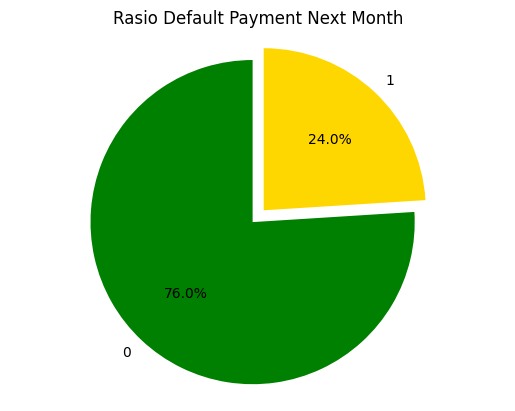

In [8]:
# Plotting pie chart
plt.pie(default_payment_next_month_count, 
        labels=['0', '1'], startangle=90,
        colors=['green','gold'],
        autopct='%1.1f%%', explode=[0,0.1])
plt.axis('equal')
plt.title('Rasio Default Payment Next Month')

plt.show()

Bisa dilihat pada kolom *default_payment_next_month* atau target terdapat imbalance karena nilai 1 atau status payment credit card default jauh lebih sedikit ketimbang 0 atau status payment credit card tidak default.

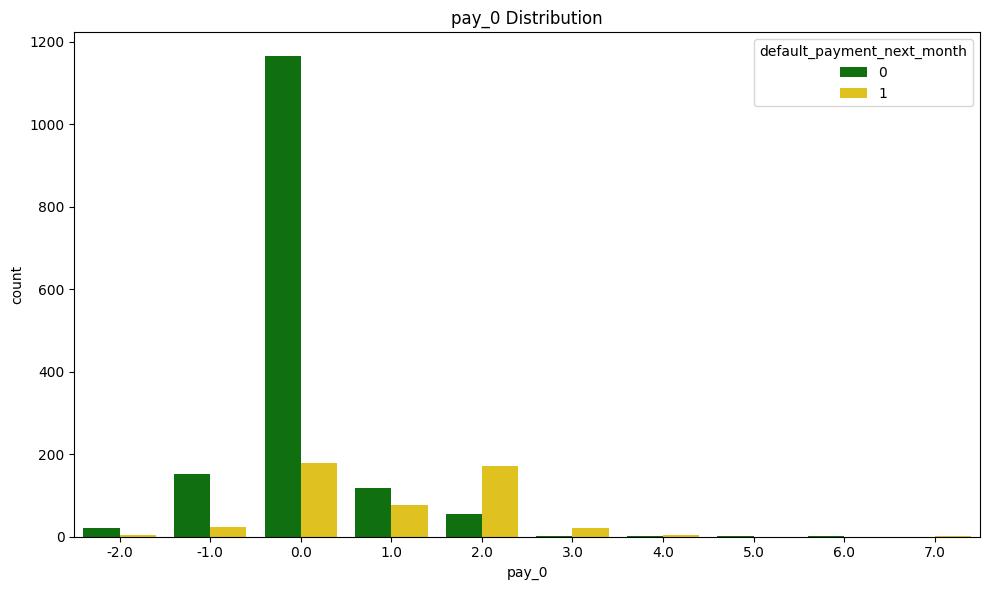

In [9]:
# Membuat Countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='pay_0', hue='default_payment_next_month', palette=['green', 'gold'])
ax.set_title('pay_0 Distribution')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()
plt.show()

Bisa dilihat dari countplot diatas jika berdasarkan *pay_0* distribution, kebanyakan jenis pay_0 yang 0 atau bayar tepat waktu tidak mengalami credit card default namun masih ada sekitar 190 klien yang status payment credit card nya default walaupun sudah bayar tepat waktu. Dan juga pada jenis pay_0 2.0 atau pembayaran delay 2 bulan memiliki status payment default lebih banyak ketimbang status payment tidak default.

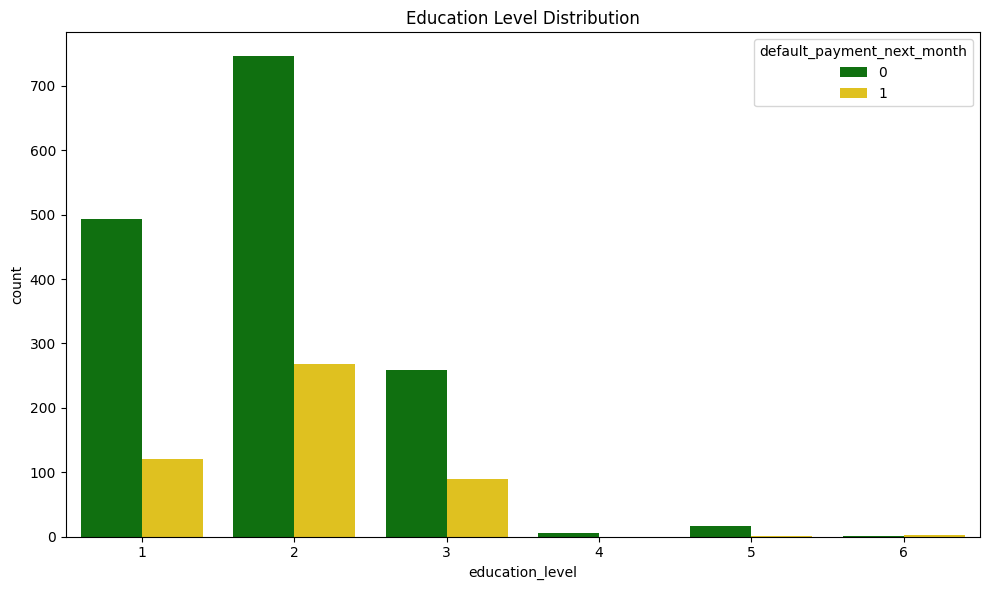

In [10]:
# Membuat Countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='education_level', hue='default_payment_next_month', palette=['green', 'gold'])
ax.set_title('Education Level Distribution')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()
plt.show()

Bisa dilihat berdasarkan countplot diatas perbandingan status payment credit card berdasarkan education level, jumlah klien yang statusnya non-default paling banyak ada di education level 2 atau klien dengan education level university. Untuk jumlah klien yang statusnya default paling banyak juga ada di education level 2 atau tingkat university.

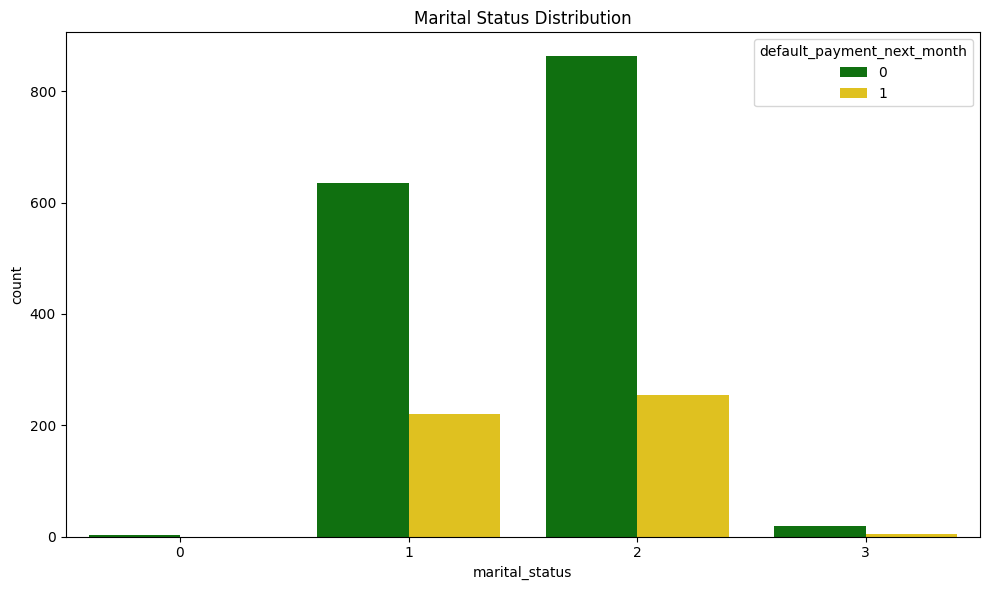

In [11]:
# Membuat Countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='marital_status', hue='default_payment_next_month', palette=['green', 'gold'])
ax.set_title('Marital Status Distribution')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()
plt.show()

Bisa dilihat hasil dari perbandingan status payment credit card dengan marital status atau status pernikahan, dalam dataset ini klien yang single (2) memiliki frekuensi data yang lebih banyak daripada yang sudah menikah (1). Namun bisa dilihat pattern atau pola dari kedua value tersebut ada kemiripan.

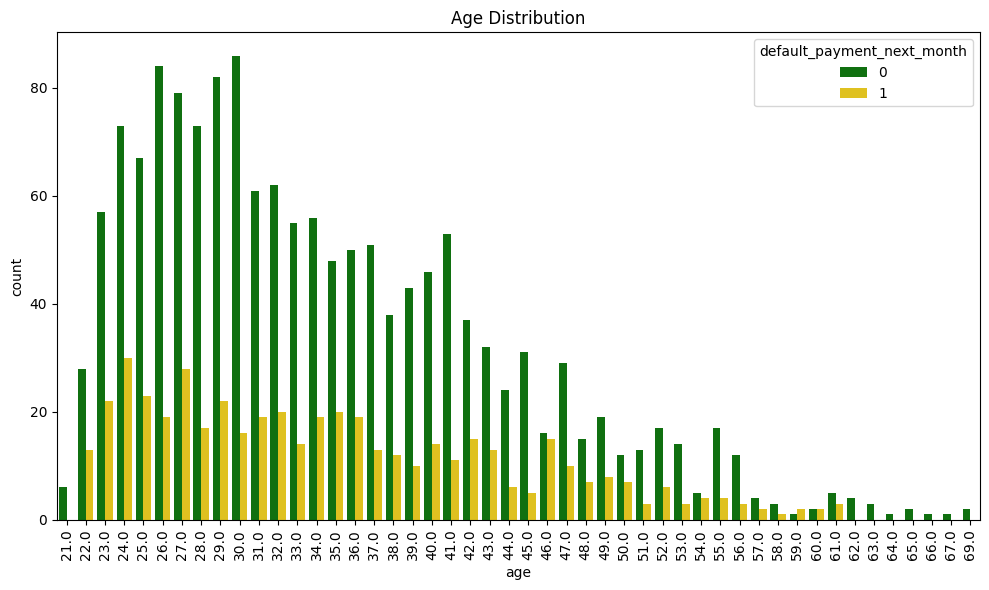

In [12]:
# Membuat Countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='age', hue='default_payment_next_month', palette=['green', 'gold'])
ax.set_title('Age Distribution')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

Bisa dilihat berdasarkan countplot perbandingan status payment credit card berdasarkan distribusi umur, umur klien yang memiliki jumlah status payment non-default (0) adalah 30 tahun dan untuk jumlah status payment default (1) paling banyak ada pada umur klien 24 tahun. Secara sekilas bisa terlihat jika walaupun jumlah antara yang default dan non-default berbeda jauh, namun secara density atau pola antara default dan non-default berdasarkan umur memiliki kemiripan. Persebaran umur klien kartu kredit ini juga lebih banyak di sekitar umur 20-30 tahun, hal ini bisa terjadi karena memang ketika umur 20-30 ini tingkat spending seseorang sedang tinggi tinggi nya mulai dari shopping, kebutuhan sehari hari dan masih banyak hal lainnya.

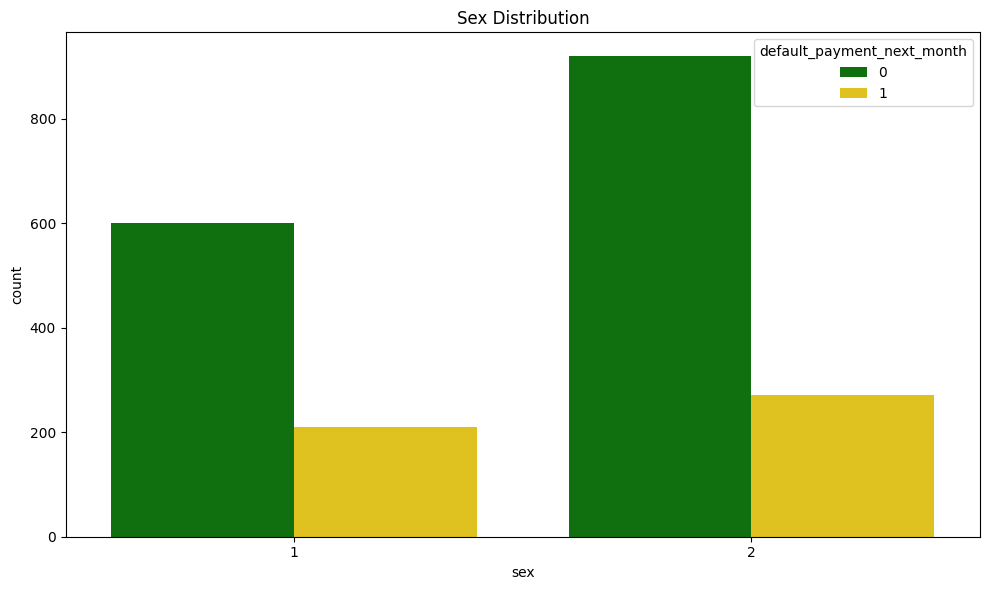

In [13]:
# Membuat Countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='sex', hue='default_payment_next_month', palette=['green', 'gold'])
ax.set_title('Sex Distribution')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()
plt.show()

Bisa dilihat berdasarkan countplot perbandingan status payment credit card berdasarkan sex atau jenis kelamin kalau sex 2 atau dalam kasus ini female lebih memiliki jumlah default dan non-default lebih banyak namun untuk jumlah yang default tidak terlampau jauh dengan sex 1 atau male. Perbedaan ini bisa saja terjadi karena dalam dataset ini klien yang perempuan jumlahnya lebih banyak ketimbang yang pria.

<function matplotlib.pyplot.show(close=None, block=None)>

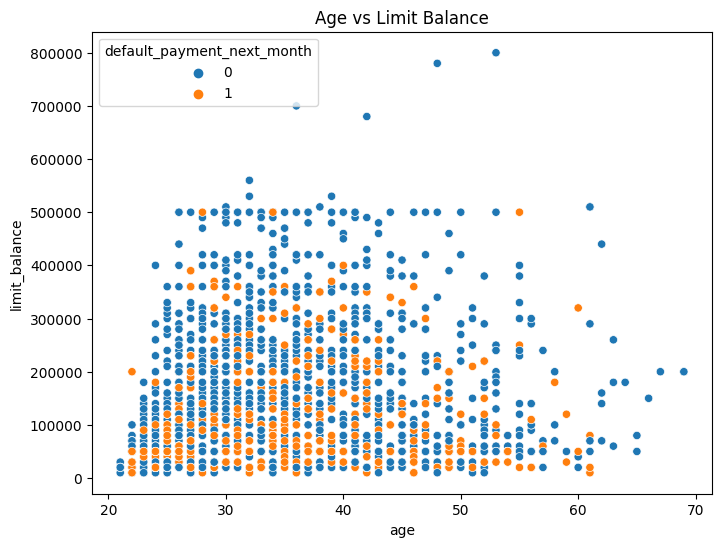

In [14]:
# Membuat Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='limit_balance',hue='default_payment_next_month', data=df)
plt.title('Age vs Limit Balance')
plt.show

Berdasarkan scatter plot diatas dapat dilihat jika tidak ada korelasi yang signifikan antara age, limit balance dan juga status payment. Jadi seseorang klien yang usia nya sudah mencapai 60 tidak menutup kemungkinan jika limit balance yang ia terima masih terbilang kecil dan belum tentu juga semakin bertambah umur status payment nya selalu tidak default. Jadi dapat diambil kesimpulan jika tidak ada korelasi yang signifikan di antara age, limit balance dan status payment credit card.

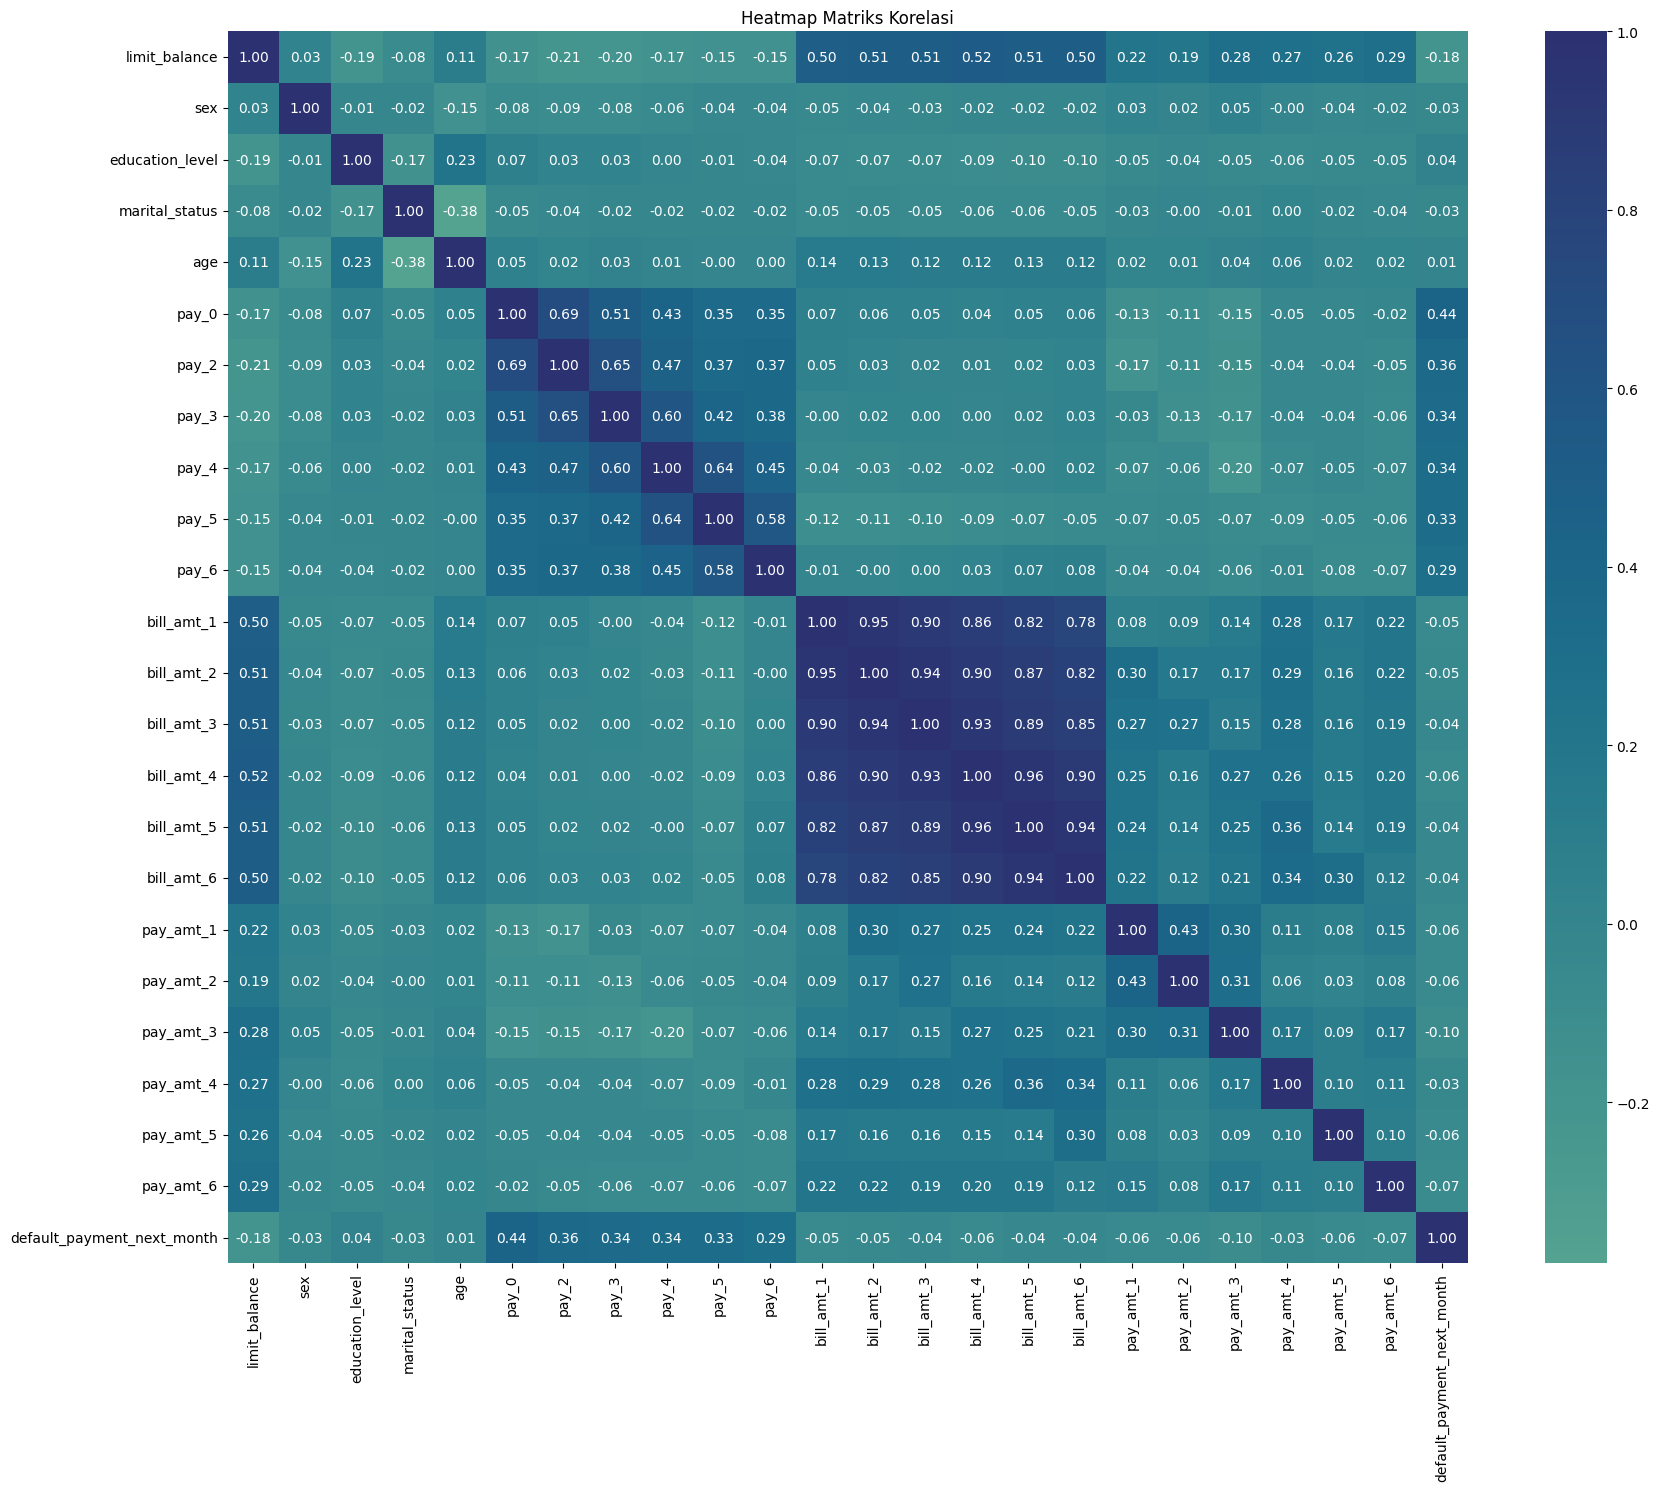

In [15]:
# Membuat heatmap untuk melihat korelasi NUM
correlation_matrix = df.select_dtypes(exclude='object').corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f', center=0)
plt.title('Heatmap Matriks Korelasi')
plt.show()

In [ ]:
df.columns

Bisa dilihat berdasarkan hasil korelasi diatas fitur yang memiliki korelasi paling tinggi dengan target *default_payment_next_month* adalah fitur *pay_0*, *pay_1*, *pay_2*, *pay_3*, *pay_4*, *pay_5* dan *pay_6* yang dimana status pembayaran (tepat waktu atau delay) klien tiap bulannya memiliki korelasi dengan target.

---

# vi - Feature Engineering

## Copy Dataframe untuk Feature Engineering

In [16]:
# Copy df untuk Feature Engineering
df_fe = df.copy()
df_fe.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0


## Membuat Dataframe untuk Inference

In [17]:
# menyimpan 1 data random dari data asli untuk digunakan sebagai data inference ke dalam variabel data_inf
data_inf = df_fe.sample(1, random_state=27)

# menghapus data inference dari df_fe
df_fe.drop(data_inf.index, inplace=True)

# melakukan reset index untuk data_inf dan df_fe
df_fe.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# menghapus target di data_inf
data_inf.drop(['default_payment_next_month'], axis=1, inplace=True)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,360000.0,1,1,2,28.0,0.0,0.0,0.0,0.0,0,...,127146.0,103273.0,91933.0,108163.0,25126.0,60259.0,27208.0,31262.0,90114.0,30463.0


## Handling Missing Values

In [18]:
# Mencari missing values 
df_fe.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Bisa dilihat dari hasil kode diatas jika tidak terdapat missing values pada dataframe yang akan digunakan.

## Split Feature dan Target

In [19]:
# Split x dan y
X = df_fe.drop(columns=['default_payment_next_month'],axis=1)
y = df_fe['default_payment_next_month']
X.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0,...,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0,...,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0,...,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0,...,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0,...,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0


Split antara fitur dan target, untuk model kali ini target yang digunakan adalah kolom *default_payment_next_month*.

## Split Train dan Test

In [20]:
# Split menggunakan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

print('train Size', X_train.shape)
print('test size', X_test.shape)
X_train.head()

train Size (1599, 23)
test size (400, 23)


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1034,80000.0,2,2,2,23.0,2.0,0.0,0.0,0.0,0,...,47680.0,33336.0,24439.0,26187.0,3139.0,4000.0,3000.0,2000.0,2000.0,0.0
1975,200000.0,2,1,2,28.0,1.0,-1.0,3.0,2.0,2,...,344.0,344.0,0.0,0.0,344.0,0.0,0.0,0.0,0.0,250.0
1356,50000.0,1,1,1,48.0,2.0,2.0,2.0,2.0,0,...,50382.0,49162.0,40973.0,39671.0,4000.0,1500.0,0.0,1275.0,1377.0,1882.0
1634,120000.0,1,3,1,45.0,0.0,0.0,-1.0,-1.0,0,...,225.0,3550.0,3550.0,3550.0,3000.0,225.0,3550.0,0.0,0.0,0.0
1414,50000.0,2,2,1,29.0,2.0,3.0,2.0,0.0,0,...,46543.0,19359.0,17850.0,18203.0,1000.0,5.0,661.0,770.0,800.0,763.0


Split antara data yang akan digunakan untuk test dan train.

## Balancing Data

In [21]:
# Balancing data dengan SMOTENC
smote_nc = SMOTENC(sampling_strategy='minority', categorical_features=[1, 2, 3, 5, 6, 7, 8, 9, 10])
X_train, y_train = smote_nc.fit_resample(X_train, y_train)

X_train = pd.DataFrame(X_train, columns=X_train.columns)
y_train.value_counts()

default_payment_next_month
1    1208
0    1208
Name: count, dtype: int64

Bisa dilihat setelah dilakukan balancing jumlah nilai 1 dan 0 pada target menjadi balance.

## Categorical and Numerical Columns

In [22]:
# Cek Kolom
X_train.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6'],
      dtype='object')

In [23]:
# Memisahkan Categorical dan Numerical Column
num_cols = ['limit_balance', 'age', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6']

cat_cols = ['sex', 'education_level', 'marital_status', 'pay_0', 
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

Pada bagian ini telah dilakukan split antara numerical kolom dan categorical kolom.

## Handling Outliers

In [24]:
# Cek Skewness 
print('skewness limit_balance:', X_train['limit_balance'].skew())
print('skewness age:', X_train['age'].skew())
print('skewness bill_amt_1:', X_train['bill_amt_1'].skew())
print('skewness bill_amt_2:', X_train['bill_amt_2'].skew())
print('skewness bill_amt_3:', X_train['bill_amt_3'].skew())
print('skewness bill_amt_4:', X_train['bill_amt_4'].skew())
print('skewness bill_amt_5:', X_train['bill_amt_5'].skew())
print('skewness bill_amt_6:', X_train['bill_amt_6'].skew())
print('skewness pay_amt_1:', X_train['pay_amt_1'].skew())
print('skewness pay_amt_2:', X_train['pay_amt_2'].skew())
print('skewness pay_amt_3:', X_train['pay_amt_3'].skew())
print('skewness pay_amt_4:', X_train['pay_amt_4'].skew())
print('skewness pay_amt_5:', X_train['pay_amt_5'].skew())
print('skewness pay_amt_6:', X_train['pay_amt_6'].skew())

skewness limit_balance: 1.3926140066437722
skewness age: 0.7450794471883578
skewness bill_amt_1: 2.304788004703606
skewness bill_amt_2: 2.2055913684304467
skewness bill_amt_3: 2.343983591827724
skewness bill_amt_4: 2.19086767304766
skewness bill_amt_5: 2.144052939761815
skewness bill_amt_6: 2.1332964781694828
skewness pay_amt_1: 14.570305530475986
skewness pay_amt_2: 33.058812330935474
skewness pay_amt_3: 9.526476540775393
skewness pay_amt_4: 9.818386910554056
skewness pay_amt_5: 14.64827840228888
skewness pay_amt_6: 7.854078620752535


Bisa dilihat tingkat skewness dari numerical columns kebanyakan memiliki skewness lebih dari 1 dan hanya 1 fitur yang memiliki skewness dibawah 1 yaitu fitur age.

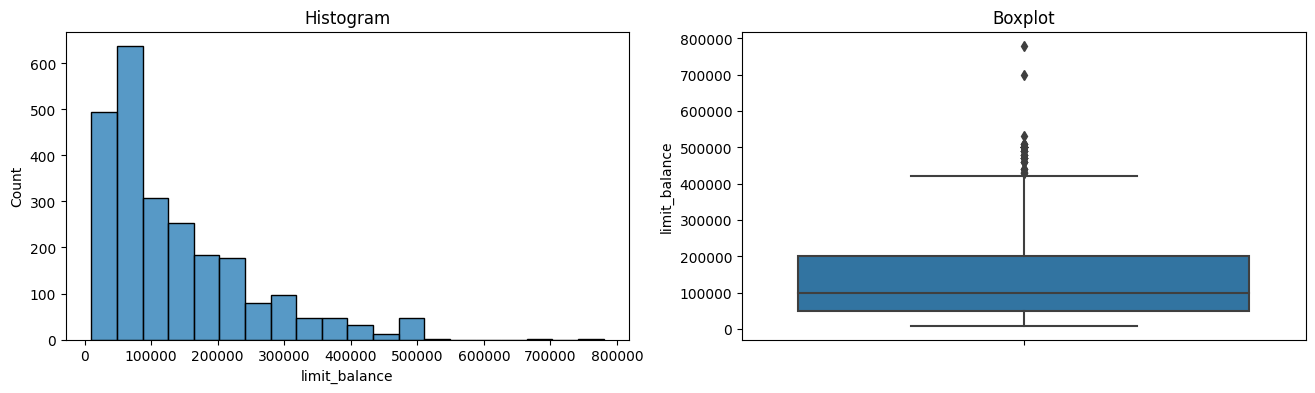

In [25]:
# Membuat Histogram dan Boxplot limit_balance
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['limit_balance'], bins=20)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['limit_balance'])
plt.title('Boxplot')

plt.show()

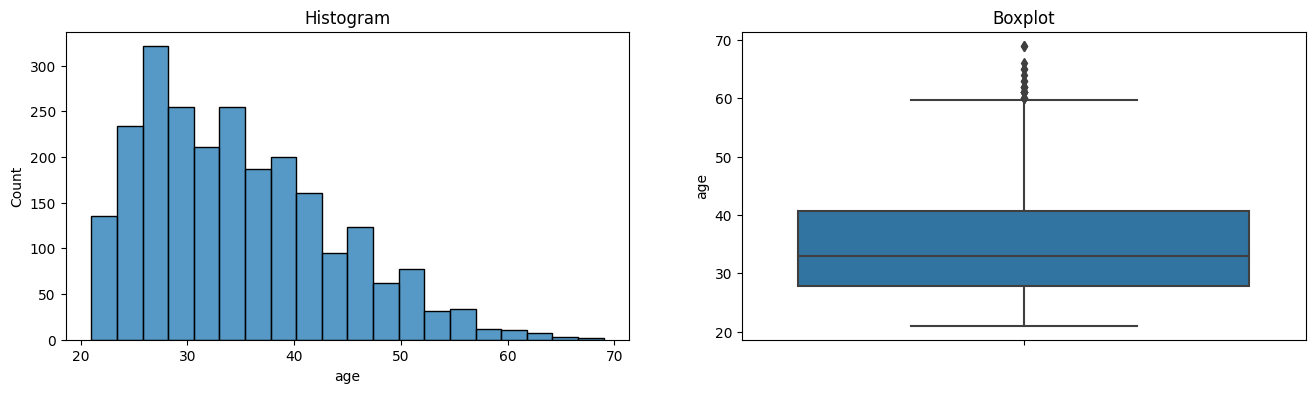

In [26]:
# Membuat Histogram dan Boxplot age
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['age'], bins=20)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['age'])
plt.title('Boxplot')

plt.show()

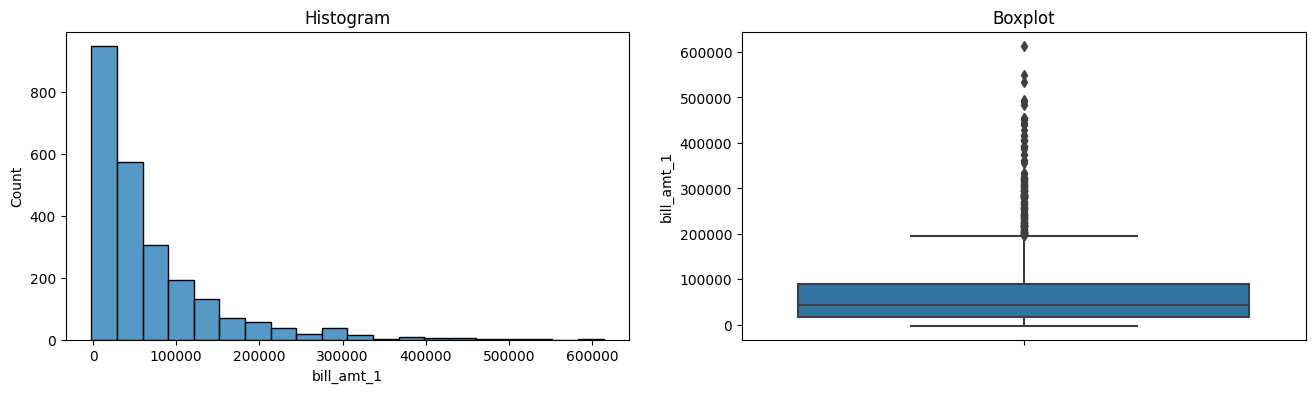

In [27]:
# Membuat Histogram dan Boxplot bill_amt_1
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['bill_amt_1'], bins=20)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['bill_amt_1'])
plt.title('Boxplot')

plt.show()

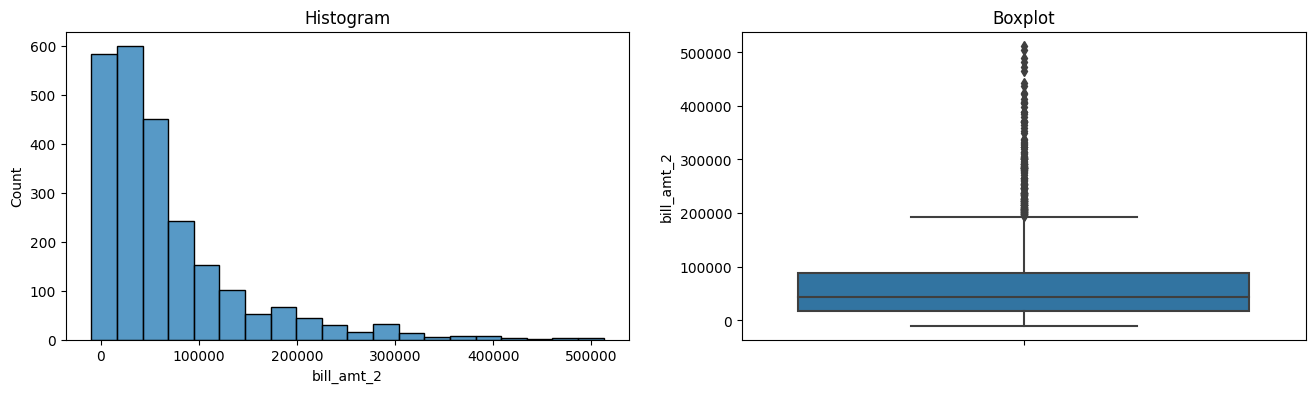

In [28]:
# Membuat Histogram dan Boxplot bill_amt_2
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['bill_amt_2'], bins=20)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['bill_amt_2'])
plt.title('Boxplot')

plt.show()

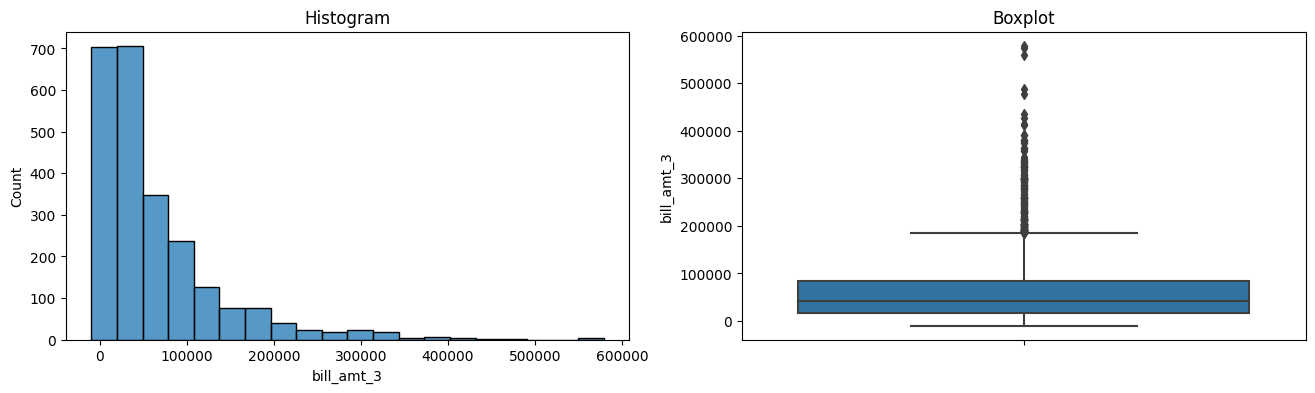

In [29]:
# Membuat Histogram dan Boxplot bill_amt_3
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['bill_amt_3'], bins=20)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['bill_amt_3'])
plt.title('Boxplot')

plt.show()

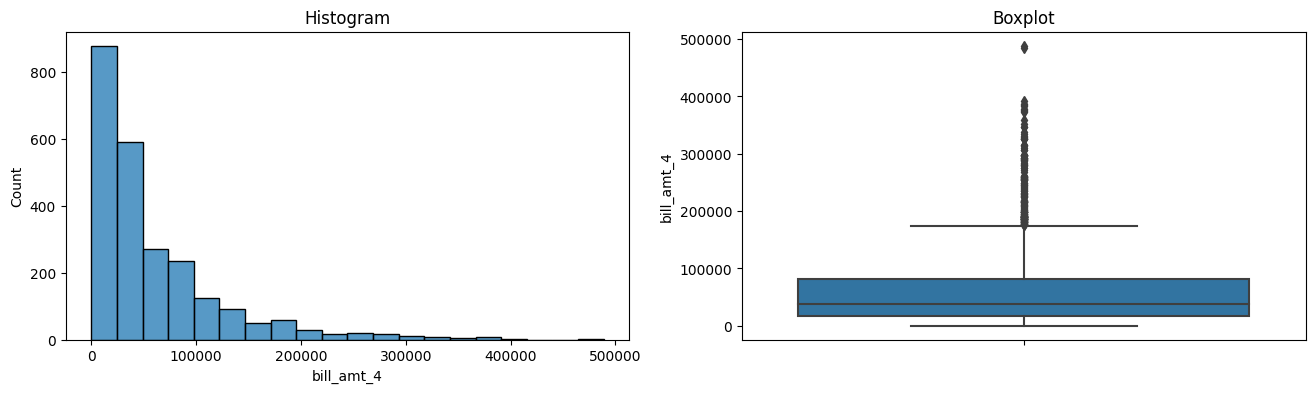

In [30]:
# Membuat Histogram dan Boxplot bill_amt_4
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['bill_amt_4'], bins=20)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['bill_amt_4'])
plt.title('Boxplot')

plt.show()

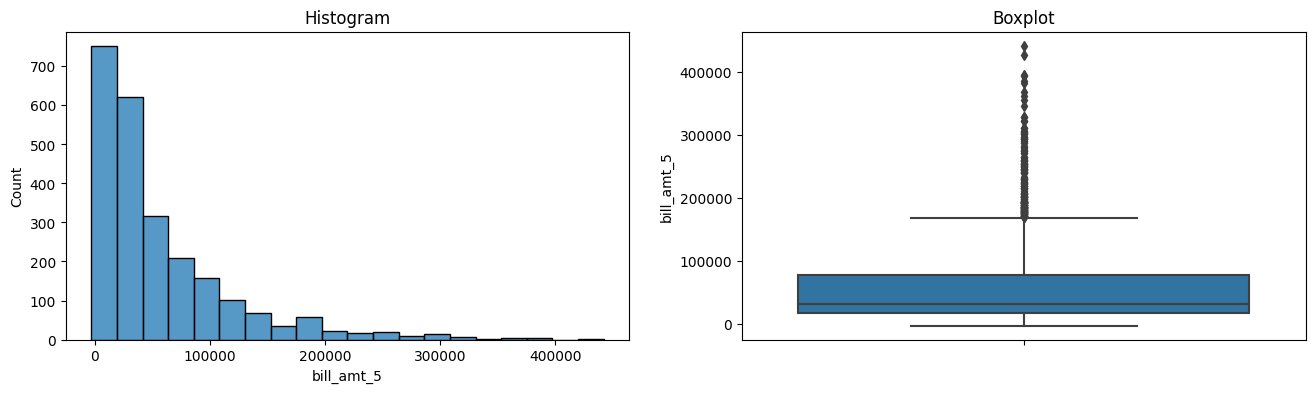

In [31]:
# Membuat Histogram dan Boxplot bill_amt_5
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['bill_amt_5'], bins=20)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['bill_amt_5'])
plt.title('Boxplot')

plt.show()

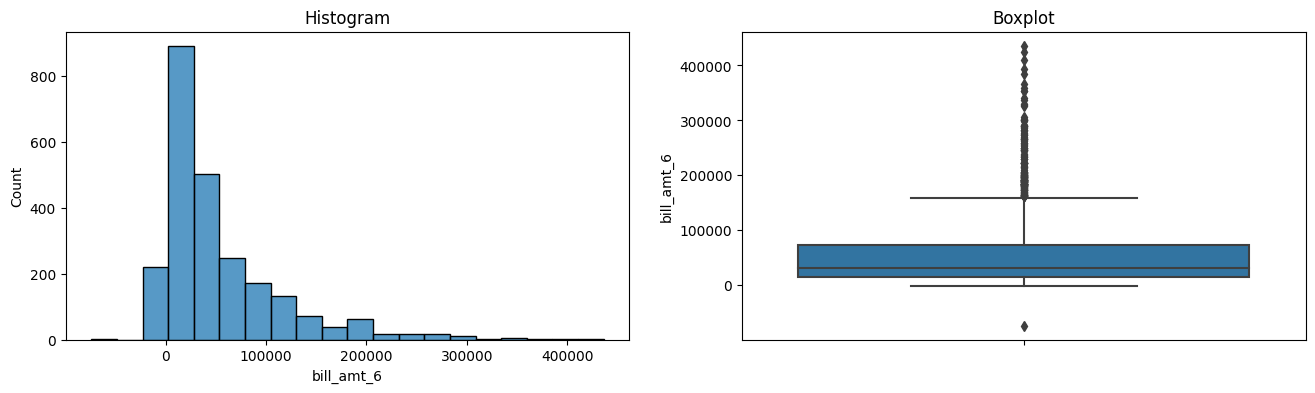

In [32]:
# Membuat Histogram dan Boxplot bill_amt_6
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['bill_amt_6'], bins=20)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['bill_amt_6'])
plt.title('Boxplot')

plt.show()

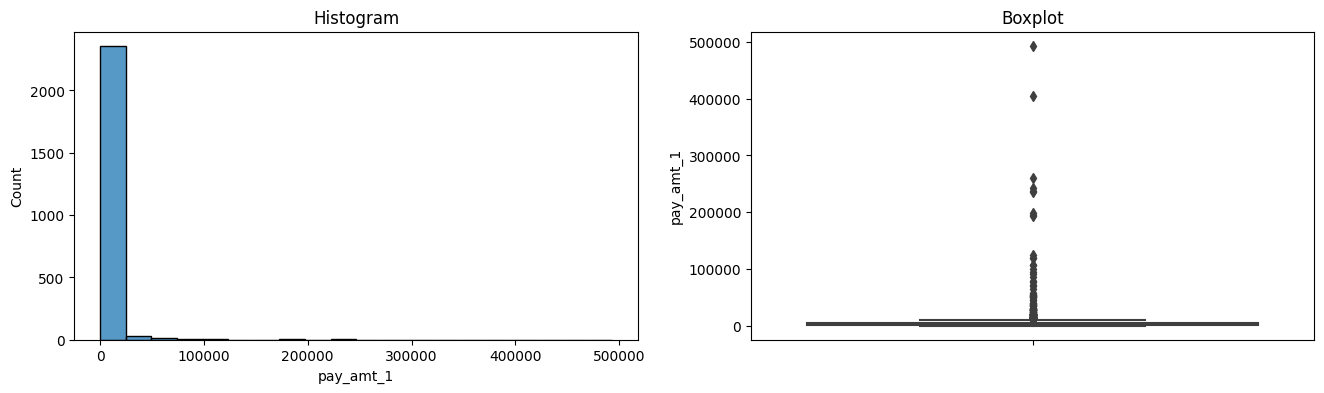

In [33]:
# Membuat Histogram dan Boxplot pay_amt_1
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['pay_amt_1'], bins=20)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['pay_amt_1'])
plt.title('Boxplot')

plt.show()

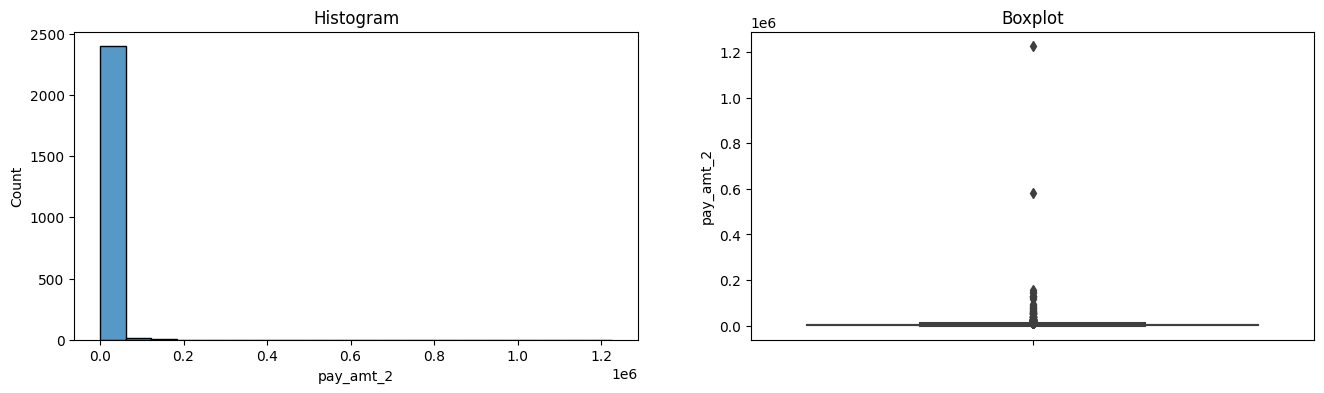

In [34]:
# Membuat Histogram dan Boxplot pay_amt_2
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['pay_amt_2'], bins=20)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['pay_amt_2'])
plt.title('Boxplot')

plt.show()

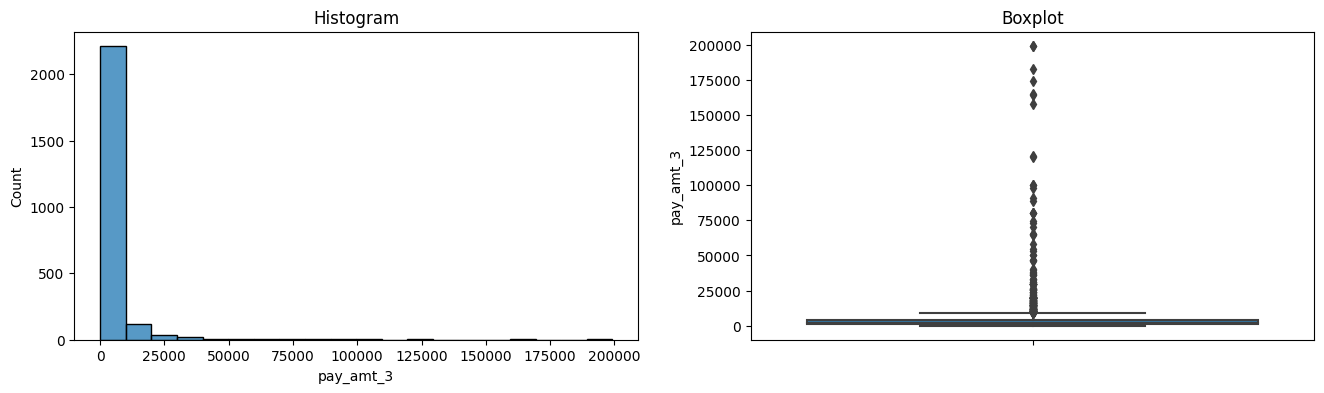

In [35]:
# Membuat Histogram dan Boxplot pay_amt_3
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['pay_amt_3'], bins=20)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['pay_amt_3'])
plt.title('Boxplot')

plt.show()

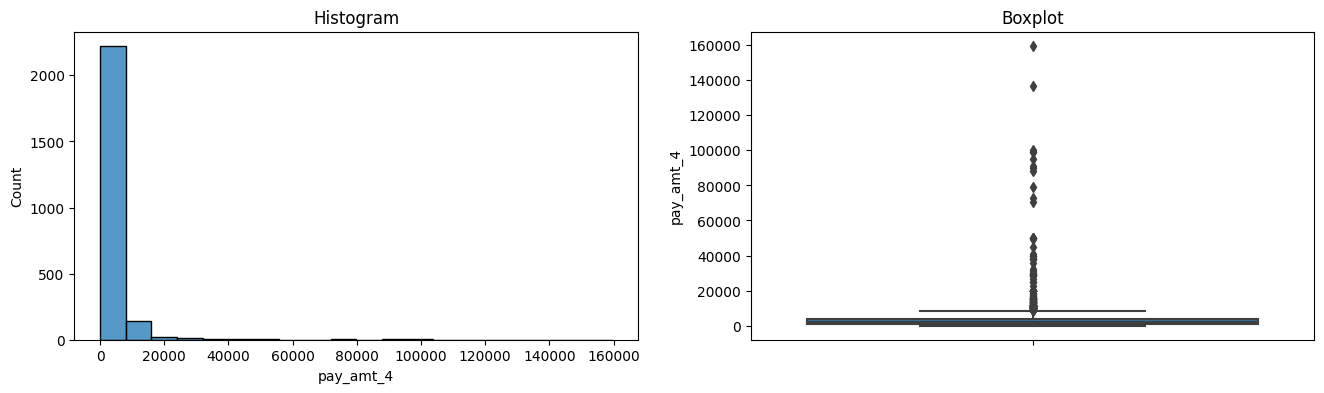

In [36]:
# Membuat Histogram dan Boxplot pay_amt_4
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['pay_amt_4'], bins=20)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['pay_amt_4'])
plt.title('Boxplot')

plt.show()

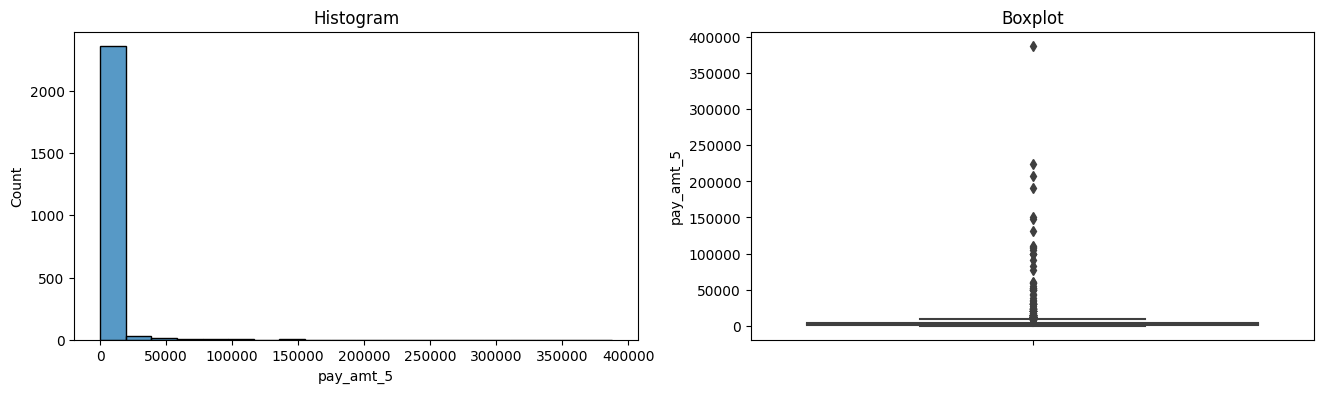

In [37]:
# Membuat Histogram dan Boxplot pay_amt_5
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['pay_amt_5'], bins=20)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['pay_amt_5'])
plt.title('Boxplot')

plt.show()

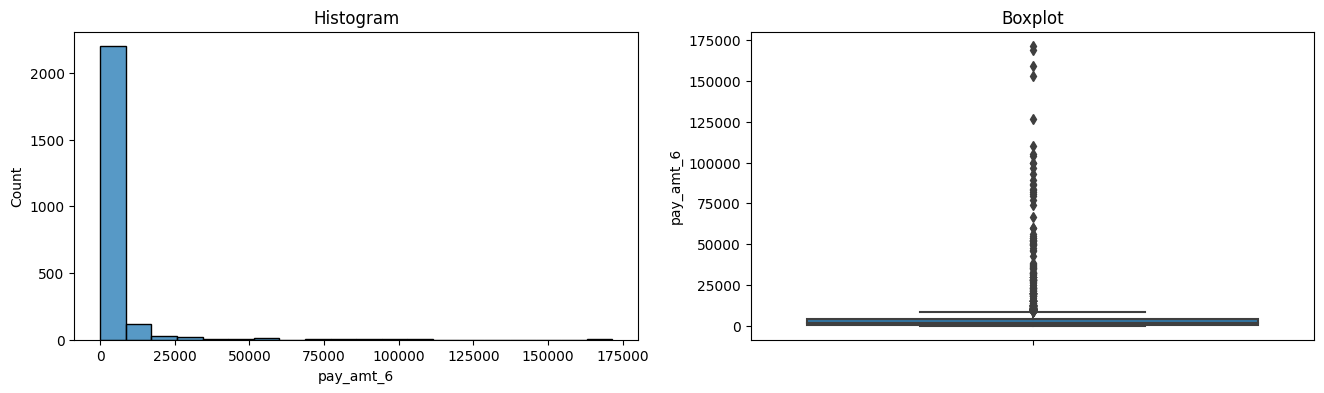

In [38]:
# Membuat Histogram dan Boxplot pay_amt_6
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['pay_amt_6'], bins=20)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['pay_amt_6'])
plt.title('Boxplot')

plt.show()

Bisa dilihat dari hasil histogram data yang skew kebanyakan distribusi condong ke kanan namun ada beberapa fitur yang distribusi nya sebagian ke kiri.

In [39]:
# IQR
q1 = X_train[num_cols].quantile(0.25)
q3 = X_train[num_cols].quantile(0.75)
iqr = q3 - q1

# lower dan upper limit
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr

# menghitung persentase outlier
outlier_percentages = ((X_train[num_cols] < lower_threshold) | (X_train[num_cols] > upper_threshold)).mean() * 100

print('outlier percentage:')
print(outlier_percentages)

outlier percentage:
limit_balance    2.690397
age              0.910596
bill_amt_1       6.788079
bill_amt_2       7.077815
bill_amt_3       7.326159
bill_amt_4       6.829470
bill_amt_5       7.119205
bill_amt_6       6.953642
pay_amt_1        8.278146
pay_amt_2        7.533113
pay_amt_3        8.899007
pay_amt_4        7.036424
pay_amt_5        7.698675
pay_amt_6        8.899007
dtype: float64


Bisa dilihat kebanyakan persentase outlier pada masing-masing kolom >5% walaupun memang beberapa ada yang memiliki persentase kecil.

In [40]:
# Create a Winsorizer instance
win = Winsorizer(capping_method='iqr', 
                 tail='both', 
                 fold=3, 
                 variables=num_cols)

# Fit and transform on the training data
X_train_capped = win.fit_transform(X_train)

Untuk kali ini saya melakukan handling outlier dengan menggunakan capping karena data yang kali ini dipakai bisa dibilang sedikit dan jika dilakukan trimming akan jadi tambah sedikit.

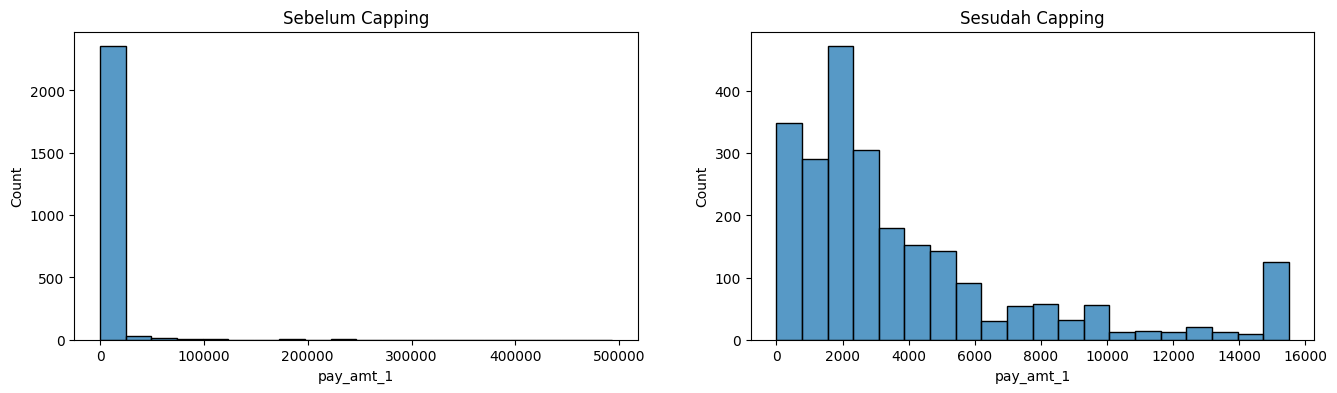

In [41]:
# Perbandingan sebelum dan sesudah capping
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['pay_amt_1'], bins=20)
plt.title('Sebelum Capping')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(X_train_capped['pay_amt_1'], bins=20)
plt.title('Sesudah Capping')

plt.show()

Bisa dilihat perbandingan antara data pay_amt_1 sebelum dan sesudah capping. Persebaran data setelah capping menjadi jauh lebih baik.

## Pipeline

In [42]:
# Define 
num_pipeline = make_pipeline(MinMaxScaler())

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_cols),
    ('pipe_cat', cat_pipeline, cat_cols)
])

clf = make_pipeline(preprocessing_pipeline)
clf.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay_amt_5', 'pay_amt_6']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'education_level',
                                                   'marital_status', 'pay_0',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6'])]))])

In [43]:
# Define X test dan test sesudah pipeline
X_train_pipeline = preprocessing_pipeline.transform(X_train)
X_test_pipeline = preprocessing_pipeline.transform(X_test)

Disini telah dilakukan pipeline, untuk numerical column disini saya menggunakan minmaxscaler karena minmaxscaler tidak merubah distribusi data dan juga secara eksplisit membantu mengurangi masalah outlier sedangkan untuk kolom categorical saya menggunakan OneHotEncoder karena secara keseluruhan pada kolom kategorikal tidak memiliki variasi yang banyak.

# vii - Model Definition

Pada bagian ini akan dilakukan model definition dengab hasil dari pipeline.

In [44]:
# Define Logistic Regression
log_model = make_pipeline(preprocessing_pipeline, LogisticRegression())
log_model.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay_amt_5', 'pay_amt_6']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'education_level',
                                                   'marital_status', 'pay_0',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6'])])),
                ('logisticregression', LogisticRegression())])

In [45]:
# Define KNN
knn_model = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())
knn_model.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay_amt_5', 'pay_amt_6']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'education_level',
                                                   'marital_status', 'pay_0',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [46]:
# Define SVM
svm_model = make_pipeline(preprocessing_pipeline, SVC())
svm_model.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay_amt_5', 'pay_amt_6']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'education_level',
                                                   'marital_status', 'pay_0',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6'])])),
                ('svc', SVC())])

---

# viii - Model Training

## Cross Validation

Cross validation akan dilakukan sebanyak 5 kali pada masing-masing model dan model yang memiliki skor precision tertinggi akan dilakukan hyperparameter tuning.

In [47]:
# Logistic Regression
score_log = cross_val_score(log_model, X_train_capped, y_train, cv=5, scoring='precision',n_jobs=-1)

In [48]:
# KNN
score_knn = cross_val_score(knn_model, X_train_capped, y_train, cv=5, scoring='precision',n_jobs=-1)

In [49]:
# SVM
score_svm = cross_val_score(svm_model, X_train_capped, y_train, cv=5, scoring='precision',n_jobs=-1)

In [50]:
#Logistic Regression
print('Logistic Regression')
print('precision Score - Mean - Cross Validation: ', round(score_log.mean(),3))
print('precision Score - Std - Cross Validation: ', round(score_log.std(),3))

Logistic Regression
precision Score - Mean - Cross Validation:  0.816
precision Score - Std - Cross Validation:  0.027


In [51]:
#knn
print('knn')
print('precision Score - Mean - Cross Validation: ', round(score_knn.mean(),3))
print('precision Score - Std - Cross Validation: ', round(score_knn.std(),3))

knn
precision Score - Mean - Cross Validation:  0.772
precision Score - Std - Cross Validation:  0.026


In [52]:
#svm
print('svm')
print('precision Score - Mean - Cross Validation: ', round(score_svm.mean(),3))
print('precision Score - Std - Cross Validation: ', round(score_svm.std(),3))

svm
precision Score - Mean - Cross Validation:  0.842
precision Score - Std - Cross Validation:  0.027


In [53]:
models = ['Logistic Regression', 'KNN', 'SVM']
recall_mean = [score_log.mean(), score_knn.mean(), score_svm.mean()]
recall_std = [score_log.std(), score_knn.std(), score_svm.mean()]

summary_table = pd.DataFrame({'Model': models, 'Precision Mean (Cross Validation)': recall_mean, 'Precision Std (Cross Validation)': recall_mean})
summary_table = summary_table.round(3)
summary_table

,Model,Precision Mean (Cross Validation),Precision Std (Cross Validation)
0,Logistic Regression,0.816,0.816
1,KNN,0.772,0.772
2,SVM,0.842,0.842


Bisa dilihat diantara 3 model, SVM memiliki hasil skor precision yang paling tinggi, maka dari itu saya akan melakukan hyperparameter tuning model SVM.

## Hyperparameter Tuning

In [54]:
# Define hyperparameter grid
param_grid = {
    'svc__C': [0.1, 1, 10],           
    'svc__kernel': ['linear', 'rbf', 'poly'],  
    'svc__gamma': [1, 0.1, 'scale', 'auto'], 
}

grid_search = GridSearchCV(svm_model, param_grid, scoring='precision', return_train_score=True, refit=True, cv=5, verbose=3, n_jobs=-1)

# Fit model grid search
grid_search.fit(X_train_capped, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['limit_balance',
                                                                          'age',
                                                                          'bill_amt_1',
                                                                          'bill_amt_2',
                                                                          'bill_amt_3',
                                                                          'bill_amt_4',
                                                                          'bill_amt_5',
                                                                          'bill_amt_6',
                                                                          'pay_amt_1',
                                                                          'pay_amt_2',
                                                                          'pay_amt_3',
                                                                          'pay_amt_4',
                                                                          'pay_amt_5',
                                                                          'pay_amt_6']),
                                                                        ('pipe_cat',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'education_level',
                                                                          'marital_status',
                                                                          'pay_0',
                                                                          'pay_2',
                                                                          'pay_3',
                                                                          'pay_4',
                                                                          'pay_5',
                                                                          'pay_6'])])),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': [1, 0.1, 'scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             return_train_score=True, scoring='precision', verbose=3)

In [55]:
# Mencari hyperparameter terbaik
best_params = grid_search.best_params_
best_params

{'svc__C': 10, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}

Berdasarkan hasil dari random search, parameter terbaik yang dapat digunakan adalah *{'svc__C': 10, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}* Maka dari itu saya akan menggunakan parameter tersebut untuk model evaluation.

---

# ix - Model Evaluation

Pada bagian ini akan dilakukan evaluasi model dengan classification report dan confussion matrix.

In [61]:
# Define model dengan hyperparameter terbaik
best_model = SVC(kernel='rbf', gamma='auto', C=10)

# Fit model
best_model.fit(X_train_pipeline, y_train)


SVC(C=10, gamma='auto')

Mendefine model SVM dengan menggunakan parameter terbaik hasil dari hyperparameter tuning dan akan dilakukan evaluasi model terbaik tersebut dengan menggunakan classification report dan confusion matrix.

In [62]:
# Evaluasi menggunakan classification report
train_predict = best_model.predict(X_train_pipeline)
test_predict = best_model.predict(X_test_pipeline)

print('Training score: {:.4f}'.format(best_model.score(X_train_pipeline, y_train)))
print(classification_report(y_train,train_predict))
print('Test score: {:.4f}'.format(best_model.score(X_test_pipeline, y_test)))
print(classification_report(y_test,test_predict))

Training score: 0.7790
              precision    recall  f1-score   support

           0       0.72      0.92      0.81      1208
           1       0.89      0.64      0.74      1208

    accuracy                           0.78      2416
   macro avg       0.80      0.78      0.77      2416
weighted avg       0.80      0.78      0.77      2416

Test score: 0.8200
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       311
           1       0.62      0.49      0.55        89

    accuracy                           0.82       400
   macro avg       0.74      0.70      0.72       400
weighted avg       0.81      0.82      0.81       400



Berdasarkan hasil classification report dapat diambil beberapa informasi sebagai berikut:
Training Set :
- Precision : 0.72 (0) dan 0.89 (1)
- Recall : 0.92 (0) dan 0.64 (1)
- F1-Score : 0.81 (0) dan 0.74 (1)
- Accuracy : 0.78

Test Set :
- Precision : 0.86 (0) dan 0.62 (1)
- Recall : 0.91 (0) dan 0.49 (1)
- F1-Score : 0.89 (0) dan 0.55 (1)
- Accuracy : 0.82

Berdasarkan rata-rata hasil precision, recall dan f1-score dari target 0 dan 1, nilai rata-rata 0 lebih besar ketimbang 1 yang dimana performa model lebih bagus untuk 0 ketimbang 1. Lalu jika dibandingkan dari hasil train dan test score nya, model ini bisa dibilang good fit karena nilai test sedikit lebih besar ketimbang nilai train. 

<Axes: >

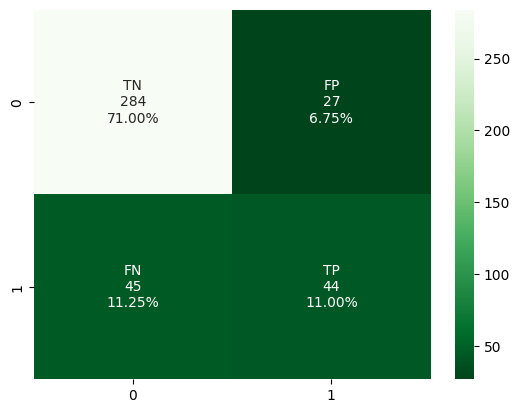

In [63]:
# Evaluasi menggunakan confusion matrix
confusion = confusion_matrix(y_test, best_model.predict(X_test_pipeline))
names = ['TN','FP','FN','TP']
counts = [value for value in confusion.flatten()]
percentages = ['{0:.2%}'.format(value) for value in confusion.flatten()/np.sum(confusion)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion,annot = labels,cmap = 'Greens_r',fmt ='')

Berdasarkan hasil confussion matrix bisa diambil kesimpulan sebagai berikut:
- True Negative (TN) : Model dengan benar memprediksi 71.00% status payment client tidak default.
- False Positive (FP) : Model salah memprediksi 6.75% yang sebenernya status payment klien tidak default namun diidentifikasi sebagai default.
- False Negative (FN) : Model salah memprediksi 11.25% yang sebenernya status payment klien default namun diidentifikasi sebagai tidak default.
- True Positive (TP) : Model dengan benar memprediksi 11.00% status payment client default.

Berdasarkan hasil diatas juga bisa menghasilkan statement sebagai berikut:
1. Berdasarkan hasil confusion matrix, model memiliki tingkat keakuratan yang tinggi dalam memprediksi status pembayaran klien yang tidak default (TN) sebesar 71.00%. Namun masih terdapat kesalahan dalam mengidentifikasi beberapa kasus yang sebenarnya tidak default sebagai default (FP) sebesar 6.75%.

2. Dari confusion matrix dapat disimpulkan bahwa model bisa menghindari kesalahan dalam memprediksi status pembayaran klien yang sebenarnya tidak default. Meskipun demikian, terdapat sejumlah kasus di mana model salah mengklasifikasikan pembayaran yang sebenarnya default sebagai tidak default (FN) sebesar 11.25%.

3. Hasil confusion matrix menunjukkan bahwa model cukup baik dalam memprediksi status pembayaran klien yang tidak default (TN), tetapi masih perlu ditingkatkan dalam mengidentifikasi keakuratan model dalam memprediksi default (TP) untuk memberikan hasil yang lebih baik.

---

# x - Model Saving

Pada bagian ini akan dilakukan saving model yang sudah dibuat dengan pipeline dan hyperparameter terbaik.

In [64]:
# Define final_pipeline
final_pipeline = make_pipeline(preprocessing_pipeline, best_model)

# fit model dengan pipeline
final_pipeline.fit(X_train, y_train)

# Prediksi menggunakan pipeline
y_pred = final_pipeline.predict(X_test)

In [65]:
with open('final_pipeline.pkl', 'wb') as file:
    pickle.dump(final_pipeline, file)

---

# xi - Model Inference 

Model inference dilakukan pada notebook *P1G5_Set_1_irfan_risqy_Model_Inference.ipynb*

---

# xii - Pengambilan Kesimpulan

Kesimpulan yang dapat diambil dari model ini adalah sebagai berikut :
- Umur klien : Berdasarkan hasil dari EDA bisa dilihat kebanyakan klien di perusahaan ini adalah di sekitar 20-30 tahun.
- Limit Balance : Berdasarkan hasil dari EDA, jumlah tinggi atau rendahnya limit balance seorang klien tidak dipengaruhi oleh umur, tingkat pendikan ataupun status pernikahan.
- Default Payment : Berdasarkan hasil dari EDA, status payment seorang klien paling dipengaruhi oleh fitur pay_0 ketimbang fitur lainnya.
- Model : Model SVM memiliki nilai precision yang paling bagus diantara 2 model lainnya dan juga model ini bisa terbilang good fit karena nilai test sedikit lebih besar ketimbang nilai train.
- Classification Report : Secara keseluruhan skor model lebih besar di nilai target 0 ketimbang 1.
- Walaupun model ini dapat meminimalisir salah identifikasi pada klien namun model ini masih memiliki beberapa kekurang seperti masih kurang efektif jika ingin mengidentifikasi klien yang mempunyai status payment default.
- Peningkatan skor pada model ini bisa dilakukan dengan cara memperbanyak data yang diolah atau mencoba model klasifikasi yang lain.

Secara singkat model ini sudah berhasil untuk mengurangi prediksi FP yaitu klien yang sebenernya status payment klien tidak default namun diidentifikasi sebagai default. Sehingga kasus seperti salah target penolakan kredit klien dan kesalahan kesalahan lain yang membuat klien menjadi terganggu dapat diminimalisir.


---

# Conceptual Problems


1. Coefficient dalam logistic regression mengukur sejauh mana setiap variabel independen berkontribusi terhadap prediksi peristiwa yang diuji. Positive coefficient menunjukkan peningkatan kemungkinan, sementara negative coefficient menunjukkan penurunan kemungkinan peristiwa tersebut. Coefficient ini secara singkat digunakan untuk menghitung probabilitas hasil logistic regression.

2. Parameter kernel pada (SVM) adalah salah satu parameter yang digunakan untuk mengubah representasi data dalam dari fitur menjadi dimensi yang lebih tinggi. Salah satu kernel yang saya tau adalah kernel RBF. Kernel RBF dapat digunakan jika data yang digunakan terdapat kepadatan yang bervariasi atau terdapat outlier.

3. Untuk mendapatkan nilai K yang optimal pada KNN adalah dengan cara mencoba nilai K tersebut satu persatu dan mencari mana nilai K yang memberikan tingkat matriks penilaian pada evaluasi model yang tertinggi.

4. Berikut penjelasannya :
    - Accuracy mengukur sejauh mana model klasifikasi benar dalam memprediksi semua kategori dengan benar. Akurasi cocok digunakan ketika semua kelas memiliki tingkat distribusi yang seimbang.
    - Precision mengukur sejauh mana prediksi positif yang dibuat oleh model itu benar atau relevan. Precision berguna ketika penting untuk meminimalkan jumlah false positive.
    - Recall mengukur sejauh mana model mampu mengidentifikasi semua contoh yang sebenarnya positif. Recall berguna ketika penting untuk meminimalkan jumlah false negative.
    - F1 Score adalah metrik gabungan yang mengkombinasikan precision dan recall untuk memberikan gambaran keseluruhan tentang kinerja model.  F1 Score berguna ketika sedang ingin mencari keseimbangan antara presisi dan recall.





